## Questions
1. Visualize the distribution of genders among patients who showed up and those who didn't?
2. Compare the age distribution for patients who showed up and those who didn't?
3. Explore the impact of enrollment in the Bolsa Família welfare program on appointment attendance?
4. Calculate the overall percentage of appointments where SMS reminders were received and visualize the difference in attendance rates between appointments with and without SMS reminders?


## Wrangle data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
appointment_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
appointment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
# Assessing the data
# Check for missing values
print("\nMissing Values:")
print(appointment_df.isnull().sum())

# Check for duplicate rows
duplicate_rows = appointment_df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_rows}")

# Explore unique values in categorical columns
print("\nUnique Values:")
for column in appointment_df.select_dtypes(include=['object']).columns:
    print(f"{column}: {appointment_df[column].unique()}")

# Cleaning the data
# Convert 'ScheduledDay' and 'AppointmentDay' to datetime format
appointment_df['ScheduledDay'] = pd.to_datetime(appointment_df['ScheduledDay'])
appointment_df['AppointmentDay'] = pd.to_datetime(appointment_df['AppointmentDay'])

# Drop unnecessary columns
appointment_df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

# Ensure 'No-show' column is consistently labeled
appointment_df['No-show'] = appointment_df['No-show'].map({'No': 0, 'Yes': 1})

# Display cleaned dataset information
print("\nCleaned Dataset Info:")
print(appointment_df.info())



Missing Values:
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Number of Duplicate Rows: 0

Unique Values:
Gender: ['F' 'M']
ScheduledDay: ['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']
AppointmentDay: ['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05

## Exploratory Data Analysis

#### 1. Visualize the distribution of genders among patients who showed up and those who didn't?

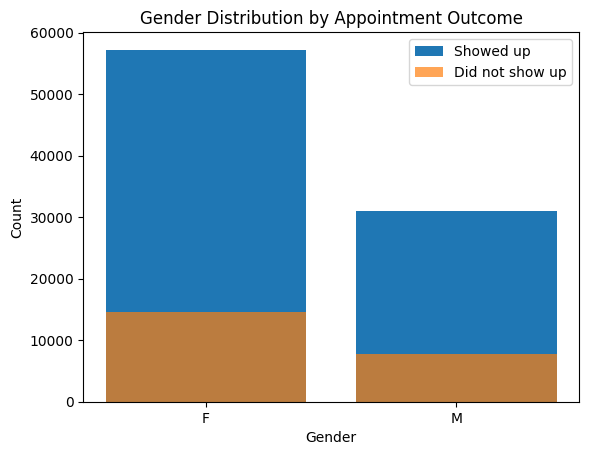

In [4]:
# Gender distribution
gender_showup = appointment_df[appointment_df['No-show'] == 'No']['Gender'].value_counts()
gender_noshow = appointment_df[appointment_df['No-show'] == 'Yes']['Gender'].value_counts()

# Plotting
plt.bar(gender_showup.index, gender_showup, label='Showed up')
plt.bar(gender_noshow.index, gender_noshow, label='Did not show up', alpha=0.7)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution by Appointment Outcome')
plt.legend()
plt.show()


#### 2. Compare the age distribution for patients who showed up and those who didn't?

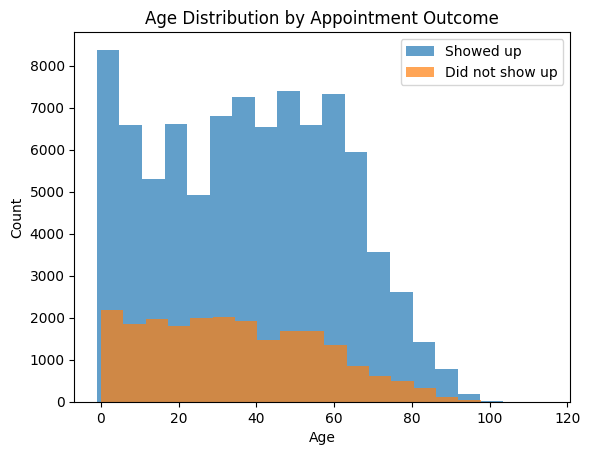

In [5]:
# Age distribution
plt.hist(appointment_df[appointment_df['No-show'] == 'No']['Age'], bins=20, label='Showed up', alpha=0.7)
plt.hist(appointment_df[appointment_df['No-show'] == 'Yes']['Age'], bins=20, label='Did not show up', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Appointment Outcome')
plt.legend()
plt.show()


#### 3. Explore the impact of enrollment in the Bolsa Família welfare program on appointment attendance?

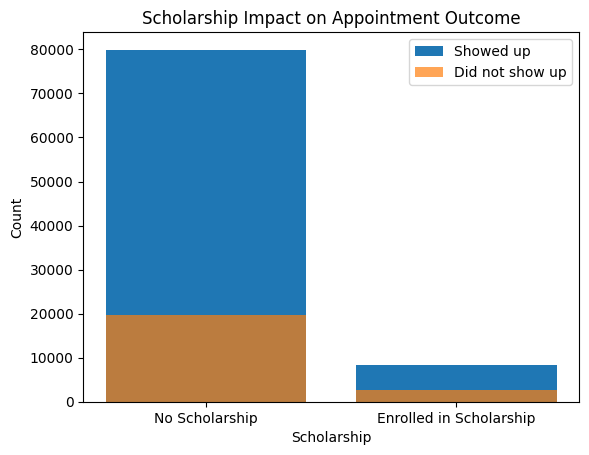

In [6]:
# Scholarship distribution
scholarship_showup = appointment_df[appointment_df['No-show'] == 'No']['Scholarship'].value_counts()
scholarship_noshow = appointment_df[appointment_df['No-show'] == 'Yes']['Scholarship'].value_counts()

# Plotting
plt.bar(scholarship_showup.index, scholarship_showup, label='Showed up')
plt.bar(scholarship_noshow.index, scholarship_noshow, label='Did not show up', alpha=0.7)
plt.xlabel('Scholarship')
plt.ylabel('Count')
plt.title('Scholarship Impact on Appointment Outcome')
plt.xticks([0, 1], ['No Scholarship', 'Enrolled in Scholarship'])
plt.legend()
plt.show()


#### 4. Calculate the overall percentage of appointments where SMS reminders were received and visualize the difference in attendance rates between appointments with and without SMS reminders?

Overall Percentage of Appointments with SMS Reminders: 32.10%


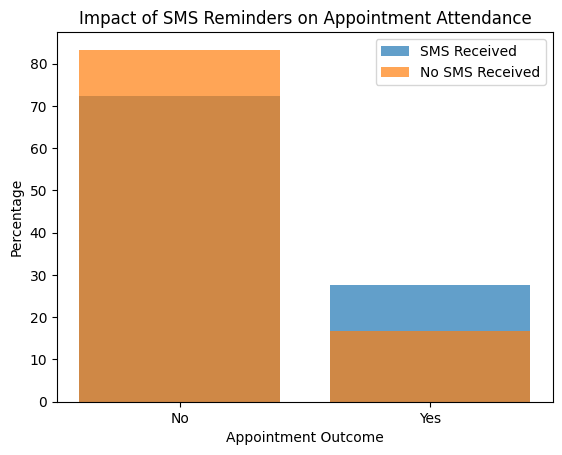

In [8]:
# Question: Calculate the overall percentage of appointments where SMS reminders were received using Pandas and NumPy
sms_percentage = np.sum(appointment_df['SMS_received']) / len(appointment_df) * 100
print(f"Overall Percentage of Appointments with SMS Reminders: {sms_percentage:.2f}%")

# Visualize the difference in attendance rates between appointments with and without SMS reminders using Matplotlib
sms_showup = appointment_df[appointment_df['SMS_received'] == 1]['No-show'].value_counts(normalize=True) * 100
no_sms_showup = appointment_df[appointment_df['SMS_received'] == 0]['No-show'].value_counts(normalize=True) * 100

# Plotting
fig, ax = plt.subplots()
ax.bar(sms_showup.index, sms_showup, label='SMS Received', alpha=0.7)
ax.bar(no_sms_showup.index, no_sms_showup, label='No SMS Received', alpha=0.7)
ax.set_xlabel('Appointment Outcome')
ax.set_ylabel('Percentage')
ax.set_title('Impact of SMS Reminders on Appointment Attendance')
ax.legend()
plt.show()


#### Conclusion
In conclusion I made data wrangling with appropriate data visualization needed. I Visualized the distribution of genders among patients who showed up and those who didn't, the age distribution for patients who showed up and those who didn't. Explored the impact of enrollment in the Bolsa Família welfare program on appointment attendance, 
Finnaly I calculated the overall percentage of appointments where SMS reminders were received and visualize the difference in attendance rates between appointments with and without SMS reminders.